# Time Series in Pandas
### Exercise 1

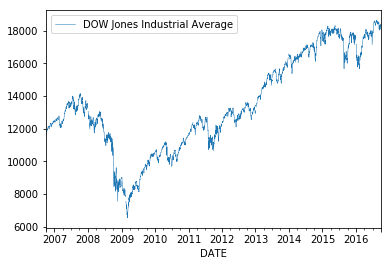

In [61]:
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt

#Import
DJIA = pd.read_csv("DJIA.csv", index_col='DATE')

# Transform to time series
DJIA.index = pd.to_datetime(DJIA.index)

#drop NA
DJIA = DJIA.dropna()

#Transform values to numeric
DJIA['VALUE'] = pd.to_numeric(DJIA['VALUE'],errors='coerce')

# Plot
DJIA.plot(y='VALUE', lw=.5, label="DOW Jones Industrial Average")


### Exercise 2

93


,Paycheck
2008-03-21,1122.26
2008-04-04,921.03
2008-04-18,962.46
2008-05-02,1035.97
2008-05-16,1078.59
2008-06-06,1110.97
2008-06-20,1121.91
2008-07-04,992.83
2008-07-18,1103.23
2008-08-01,944.66


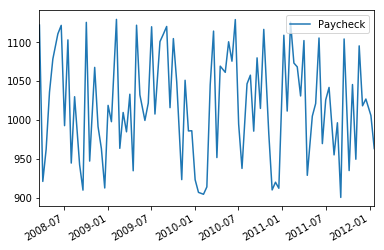

In [59]:
daterange = pd.date_range(start='03/13/2008', \
periods=46, freq="WOM-1FRI").union(pd.date_range(start='03/13/2008', \
                          periods=47, freq="WOM-3FRI"))
print(daterange.size)

paychecks = pd.read_csv('paychecks.csv', header=None, names= ['Paycheck'])
paychecks.index = daterange
paychecks.plot()
paychecks

### Exercise 5

In [70]:
(DJIA - DJIA.shift(1)).idxmax()

VALUE   2008-10-13
dtype: datetime64[ns]

In [71]:
(DJIA - DJIA.shift(1)).idxmin()

VALUE   2008-09-29
dtype: datetime64[ns]

In [73]:
(DJIA - DJIA.shift(1, freq="M")).idxmax()

VALUE   2011-10-31
dtype: datetime64[ns]

In [74]:
(DJIA - DJIA.shift(1, freq="M")).idxmin()

VALUE   2008-10-31
dtype: datetime64[ns]

In [79]:
# Beginning and end of month
month = DJIA.resample('M')
(month.last() - month.first()).idxmax()

VALUE   2015-10-31
dtype: datetime64[ns]

In [80]:
# Beginning and end of month
month = DJIA.resample('M')
(month.last() - month.first()).idxmin()

VALUE   2008-10-31
dtype: datetime64[ns]

### Exercise 6

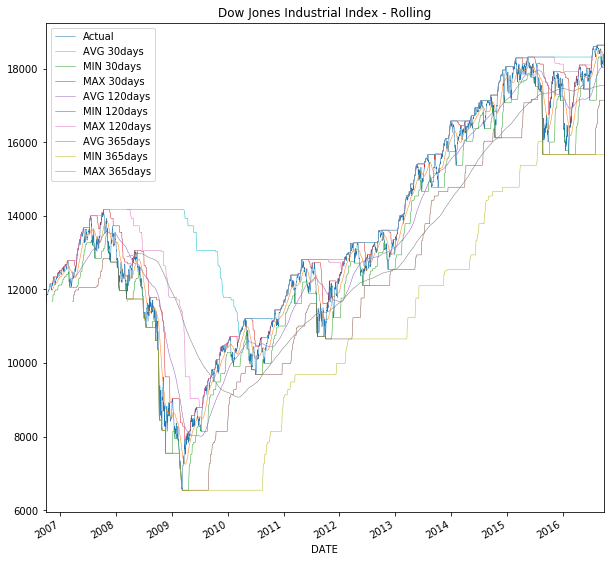

In [114]:
DJIA = DJIA.dropna()
ax = plt.subplot(111)
DJIA.plot(title="Dow Jones Industrial Index - Rolling", lw=.5, ax = ax, figsize=(10,10))
for i in [30,120,365]: 
    DJIA.rolling(window=i).mean().plot(lw=.5, ax=ax)
    DJIA.rolling(window=i).min().plot(lw=.5, ax=ax)
    DJIA.rolling(window=i).max().plot(lw=.5, ax=ax)
#     DJIA.rolling(window=i).mean().min(skipna=True).plot(lw=.5, ax=ax)


ax.legend(['Actual', 'AVG 30days', 'MIN 30days', 'MAX 30days', 'AVG 120days', 'MIN 120days', 'MAX 120days', 'AVG 365days', 'MIN 365days', 'MAX 365days'])

# DJIA.rolling(window=30).mean().min(skipna=True).plot(lw=.5)


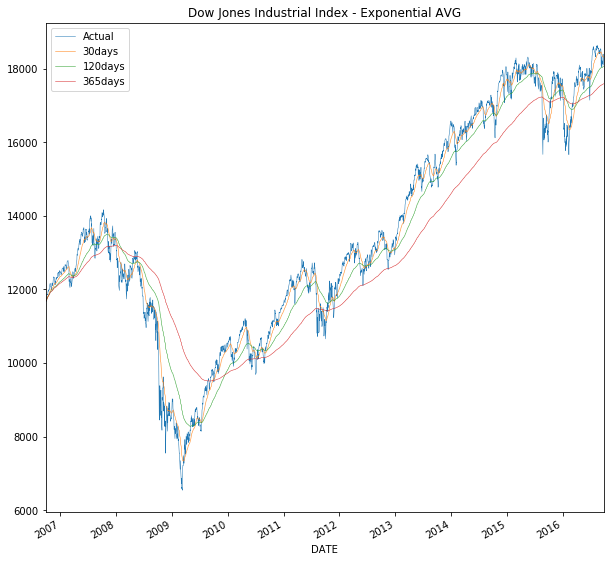

In [116]:
ax = plt.subplot(111)
DJIA.plot(title="Dow Jones Industrial Index - Exponential AVG", lw=.5, ax = ax, figsize=(10,10))
for i in [30,120,365]: 
    DJIA.ewm(span=i).mean().plot(lw=.5, ax=ax)
#     DJIA.ewm(span=i).mean().min().plot(lw=.5, ax=ax)

ax.legend(['Actual', '30days', '120days', '365days'])


DJIA

In [105]:
DJIA

,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34
2006-10-04,11850.61
2006-10-05,11866.69
2006-10-06,11850.21
2006-10-09,11857.81
